In [0]:
from google.colab import drive,files

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Imports go here

import pickle
import keras
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
from keras.layers import Dense, Activation,BatchNormalization
import pandas as pd
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import concatenate

Using TensorFlow backend.


In [0]:
pickletraindata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_full.pkl'
picklevaldata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_val_full.pkl'

pickletraindata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y1.pkl'
picklevaldata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y1.pkl'

pickletraindata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y2.pkl'
picklevaldata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y2.pkl'

pickletraindata_Y4 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y4_avg.pkl'
picklevaldata_Y4 = 'gdrive/My Drive/DL Project/PickleFiles/pickleVal_Y4_avg.pkl'

In [0]:
# Test files

pickletestdata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_test_full.pkl'
pickletestdata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y1.pkl'
pickletestdata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y2.pkl'
pickletestdata_Y4 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTest_Y4_avg.pkl'

In [0]:
# Reading train_X from the pickle files into the session and reshaping it as 66071 samples of a 3-D array

train_X_list = pickle.load(open(pickletraindata_X, 'rb' ))
train_X = np.array(train_X_list)
train_X=train_X.reshape(len(train_X_list),7,7,512)
print(train_X.shape)

(66071, 7, 7, 512)


In [0]:
# Loading train_Y1

train_Y1_list = pickle.load(open(pickletraindata_Y1, 'rb' ))
train_Y1 = np.array(train_Y1_list)
print(train_Y1.shape)

(66071, 172)


In [0]:
# Reading train_Y2 from the pickle files and modifying the ingredient vector to have {1,0}.

train_Y2_list = pickle.load(open(pickletraindata_Y2, 'rb' ))
train_Y2 = np.array(train_Y2_list)

for index in range(train_Y2.shape[0]):
  templist = train_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  train_Y2[index] = templist_0

print(train_Y2.shape)

(66071, 353)


In [0]:
# Reading Y4 from the pickle files

train_Y4_list = pickle.load(open(pickletraindata_Y4, 'rb'))
train_Y4 = np.array(train_Y4_list)
print(train_Y4.shape)

(66071,)


In [0]:
# Reading val_X from the pickle files into the session and reshaping it as 11016 samples of a 3-D array

val_X_list = pickle.load(open(picklevaldata_X, 'rb' ))
val_X = np.array(val_X_list)
val_X=val_X.reshape(len(val_X_list),7,7,512)
print(val_X.shape)

(11016, 7, 7, 512)


In [0]:
# Loading val_Y1

val_Y1_list = pickle.load(open(picklevaldata_Y1, 'rb' ))
val_Y1 = np.array(val_Y1_list)
print(val_Y1.shape)

(11016, 172)


In [0]:
# Loading val_Y2

val_Y2_list = pickle.load(open(picklevaldata_Y2, 'rb' ))
val_Y2 = np.array(val_Y2_list)

for index in range(val_Y2.shape[0]):
  templist = val_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  val_Y2[index] = templist_0

print(val_Y2.shape)

(11016, 353)


In [0]:
# Loading val Y4

val_Y4_list = pickle.load(open(picklevaldata_Y4, 'rb' ))
val_Y4 = np.array(val_Y4_list)
print(val_Y4.shape)

(11016,)


In [0]:
# Validation Metrics

def get_f1(y_true, y_pred): #https://mc.ai/how-to-add-user-defined-function-get-f1-score-in-keras-metrics/
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val

In [0]:
import functools
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)
top5_acc.__name__ = 'top5_acc'

####  Model 1 : Regression Model for Calorie Estimation.The ouput of both food and ingredient are concatenated and fed to the dense layer for calorie estimation as regression output.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 7, 7, 2048)   9439232     input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 7, 7, 2048)   9439232     input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 4, 4, 2048)   0           conv2d

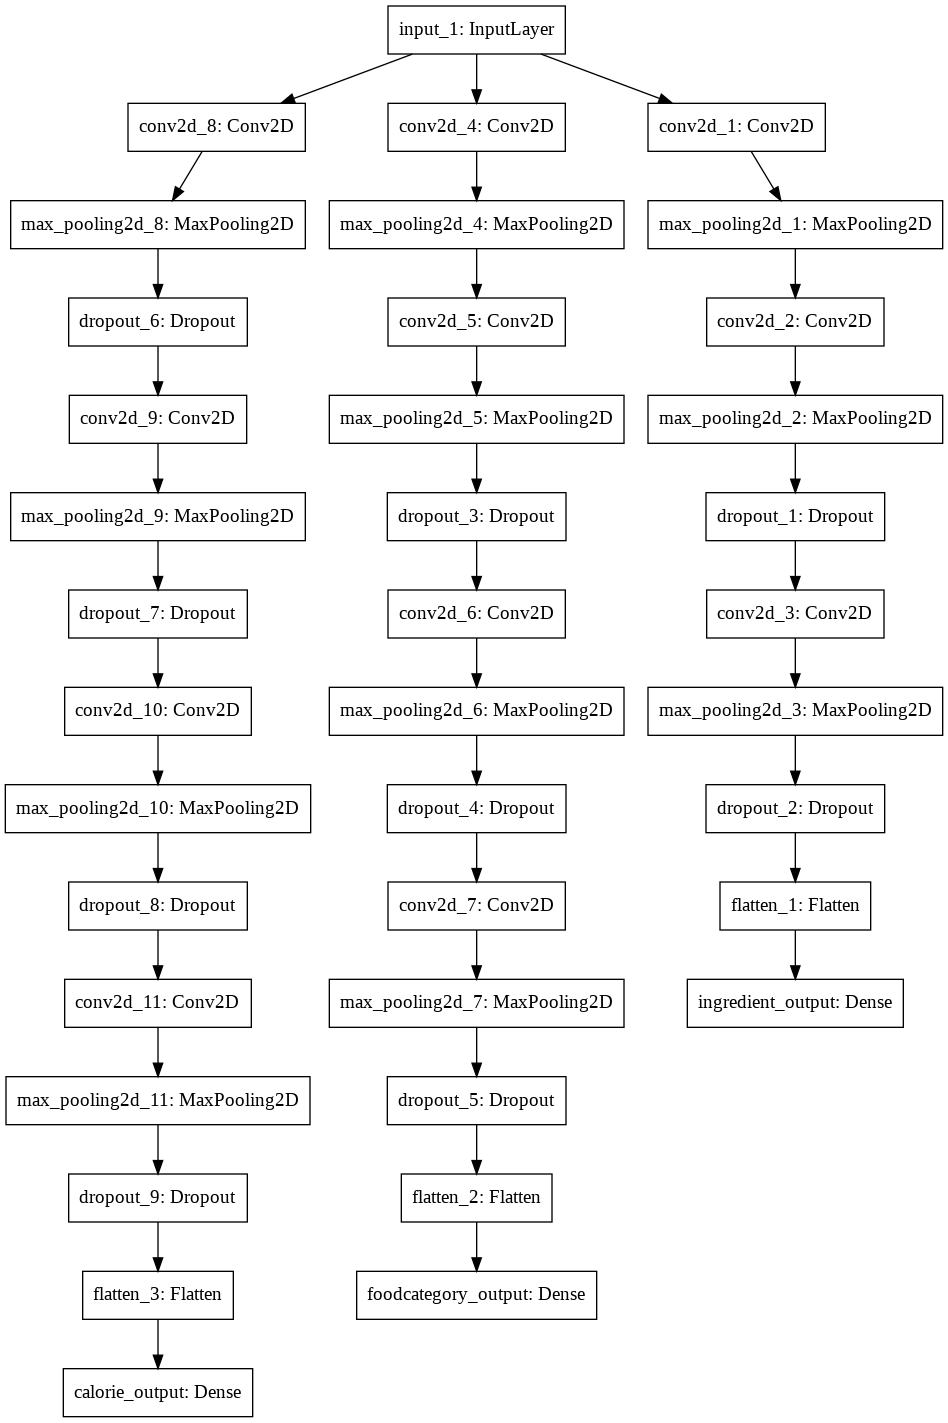

In [0]:
# Architecture - C ( Food Category,Ingredient,Calorie)

# Defining model with 3 parallel paths each with their own loss fuction in multi-tasking 
#                                       Convolution --> Food
#                                       Convolution --> Ingredient
#                                       Convolution --> Calorie

inputs = Input(shape=(7,7,512))

conv2D1 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D1)

conv2D2 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(maxPool2D1)
maxPool2D2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D2)
dropout2 = Dropout(0.5)(maxPool2D2)

conv2D3 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout2)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.5)(maxPool2D3)

flattened3 = Flatten()(dropout3)

conv2D4 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D4)

conv2D5 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(maxPool2D4)
maxPool2D5 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D5)
dropout5 = Dropout(0.5)(maxPool2D5)

conv2D6 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout5)
maxPool2D6 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D6)
dropout6 = Dropout(0.5)(maxPool2D6)

conv2D10 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout6)
maxPool2D10 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D10)
dropout10 = Dropout(0.7)(maxPool2D10)

flattened7 = Flatten()(dropout10)

conv2D7 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D7 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D7)
dropout7 = Dropout(0.3)(maxPool2D7)

conv2D8 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout7)
maxPool2D8 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D8)
dropout8 = Dropout(0.3)(maxPool2D8)

conv2D9 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout8)
maxPool2D9 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D9)
dropout9 = Dropout(0.5)(maxPool2D9)

conv2D11 = Conv2D(256, kernel_size=3, activation='relu',padding='same')(dropout9)
maxPool2D11 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D11)
dropout11 = Dropout(0.5)(maxPool2D11)

flattened9 = Flatten()(dropout11)

output1 = Dense(353,activation='sigmoid',name='ingredient_output')(flattened3)  ##  Ingredient recognition
output2 = Dense(172,activation='softmax',name='foodcategory_output')(flattened7) ##  Food categorization
output3 = Dense(1,activation = 'linear', name='calorie_output')(flattened9)  ##  Calorie Estimation

model_C = Model(inputs=inputs, outputs=[output1,output2,output3]) # Defining model with Architecture A1
print(model_C.summary()) # summarize layers
plot_model(model_C, to_file='Multi-task Architecture C for food Categorization,Ingredient Recognition and Calorie Estimation.png') # plot graph

In [0]:
model_C.compile(optimizer=Adam(lr=0.0001),
              loss={'ingredient_output': 'binary_crossentropy', 'foodcategory_output': 'categorical_crossentropy', 'calorie_output':'mse' },
              #loss={'calorie_output':'mse'},
              #loss_weights={'ingredient_output': 0.8, 'foodcategory_output': 0.2},
              #metrics=['mae','accuracy'],
              metrics=[get_f1,top5_acc,'mae'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# model.fit(train_X, [train_Y2,train_Y1,train_Y4], batch_size=256, epochs=100,validation_data = (val_X, [val_Y2, val_Y1,val_Y4]))

model_C.fit(train_X,[train_Y2,train_Y1,train_Y4], batch_size=256, epochs=50,validation_data = (val_X, [val_Y2,val_Y1,val_Y4]))





Train on 66071 samples, validate on 11016 samples
Epoch 1/50





66071/66071 [==============================] - 90s 1ms/step - loss: 2148.2581 - ingredient_output_loss: 0.1255 - foodcategory_output_loss: 5.3076 - calorie_output_loss: 2142.8250 - ingredient_output_get_f1: 0.0373 - ingredient_output_top5_acc: 0.1066 - ingredient_output_mean_absolute_error: 0.0480 - foodcategory_output_get_f1: 6.9682e-05 - foodcategory_output_top5_acc: 0.0370 - foodcategory_output_mean_absolute_error: 0.0116 - calorie_output_get_f1: 0.9999 - calorie_output_top5_acc: 1.0000 - calorie_output_mean_absolute_error: 35.2566 - val_loss: 1743.9477 - val_ingredient_output_loss: 0.0404 - val_foodcategory_output_loss: 5.0891 - val_calorie_output_loss: 1738.8182 - val_ingredient_output_get_f1: 0.0181 - val_ingredient_output_top5_acc: 0.4493 - val_ingredient_output_mean_absolute_error: 0.0134 - val_foodcategory_output_get_f1: 0.0000e+00 - val_foodcategory_output_top5_acc: 0.0534 - val_foodcategory_output_mean_abso

In [0]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open('gdrive/My Drive/DL Project/Models/Model_CalorieEstimation_C.json', "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights('gdrive/My Drive/DL Project/Models/Model_CalorieEstimation_C.h5')
print("Saved model to disk")

Saved model to disk


Model A1: Regression Model for Calorie Estimation with only food category as input for Calorie Estimation.

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 2048)        9439232   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 2048)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 1024)        18875392  
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 1024)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2, 2, 1024)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 1024)        9438

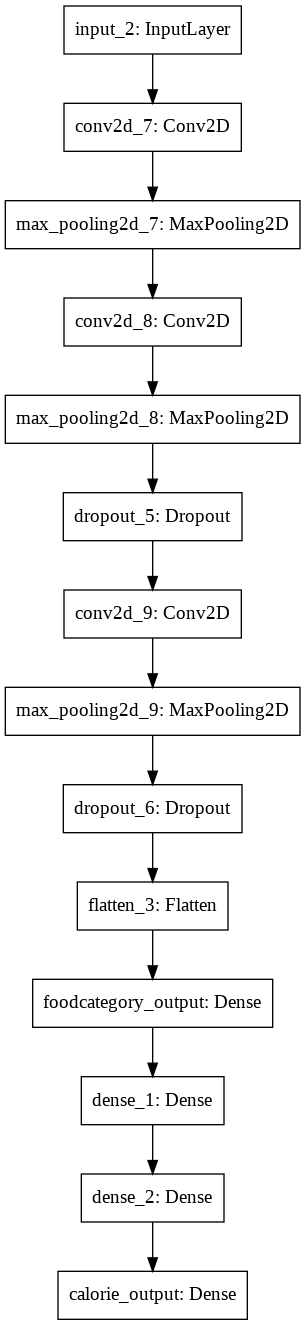

In [0]:
# Regression Model for Calorie Estimation. convolution --> food category --> calorie estimation

inputs = Input(shape=(7,7,512))

conv2D1 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D1)

conv2D2 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(maxPool2D1)
maxPool2D2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D2)
dropout2 = Dropout(0.5)(maxPool2D2)

conv2D3 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout2)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.5)(maxPool2D3)

conv2D3 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout3)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.7)(maxPool2D3)

flattened3 = Flatten()(dropout3)

output1_without_activation = Dense(172,activation=None,name='foodoutput_without_activation')(flattened3)  ##  Food Category
output1 = keras.layers.Activation("softmax",name="foodcategory_output")(output1_without_activation)

dense1 =  Dense(100, activation='relu')(output1_without_activation) 
dense2 =  Dense(20, activation='relu')(dense1)
output2 = Dense(1,activation = 'linear', name='calorie_output')(dense2)  ##  Calorie Estimation

model_A1 = Model(inputs=inputs, outputs=[output1,output2]) # Defining model with Architecture A3
print(model_A1.summary()) # summarize layers
plot_model(model_A1, to_file='Calorie Estimation with Food Recognition.png') # plot graph

In [0]:
model_A1.compile(optimizer=Adam(lr=0.00005),
              loss={'foodcategory_output': 'categorical_crossentropy','calorie_output' : 'mse'},
              #loss_weights={'ingredient_output': 0.8, 'foodcategory_output': 0.2},
              metrics=[top5_acc,'mae'])

In [0]:
model_A1.fit(train_X, [train_Y1,train_Y4], batch_size=256, epochs=50,validation_data = (val_X, [val_Y1,val_Y4]))

Train on 66071 samples, validate on 11016 samples
Epoch 1/40
66071/66071 [==============================] - 30s 452us/step - loss: 83736.8340 - foodcategory_output_loss: 16.0403 - calorie_output_loss: 83720.7941 - foodcategory_output_top5_acc: 0.9798 - foodcategory_output_mean_absolute_error: 0.0116 - calorie_output_top5_acc: 1.0000 - calorie_output_mean_absolute_error: 241.9198 - val_loss: 83457.9558 - val_foodcategory_output_loss: 16.0420 - val_calorie_output_loss: 83441.9137 - val_foodcategory_output_top5_acc: 1.0000 - val_foodcategory_output_mean_absolute_error: 0.0116 - val_calorie_output_top5_acc: 1.0000 - val_calorie_output_mean_absolute_error: 242.0703
Epoch 2/40
66071/66071 [==============================] - 29s 433us/step - loss: 83651.0051 - foodcategory_output_loss: 16.0432 - calorie_output_loss: 83634.9622 - foodcategory_output_top5_acc: 1.0000 - foodcategory_output_mean_absolute_error: 0.0116 - calorie_output_top5_acc: 1.0000 - calorie_output_mean_absolute_error: 241.7425

### Model A3: Regression Model for Calorie Estimation with both Ingredient and FoodCategory concatenated as inputs to Calorie Estimation

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 7, 7, 512)    0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 7, 7, 2048)   9439232     input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_22 (MaxPooling2D) (None, 4, 4, 2048)   0           conv2d_22[0][0]                  
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 4, 4, 1024)   18875392    max_pooling2d_22[0][0]           
____________________________________________________________________________________________

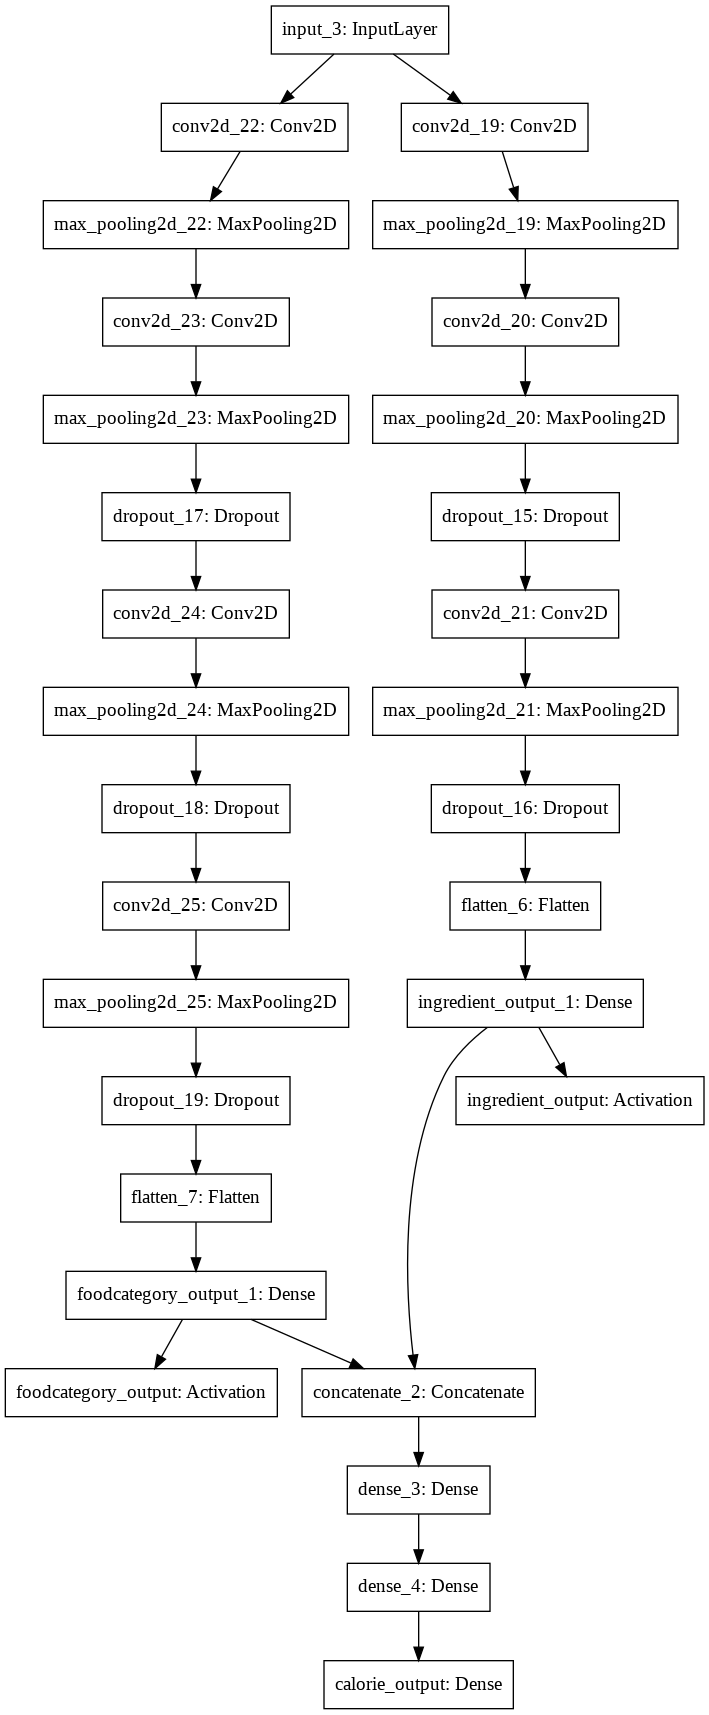

In [0]:
inputs = Input(shape=(7,7,512))

conv2D1 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D1)

conv2D2 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(maxPool2D1)
maxPool2D2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D2)
dropout2 = Dropout(0.5)(maxPool2D2)

conv2D3 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout2)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.5)(maxPool2D3)

flattened3 = Flatten()(dropout3)

conv2D4 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D4)

conv2D5 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(maxPool2D4)
maxPool2D5 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D5)
dropout5 = Dropout(0.5)(maxPool2D5)

conv2D6 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout5)
maxPool2D6 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D6)
dropout6 = Dropout(0.7)(maxPool2D6)

conv2D7 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout6)
maxPool2D7 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D7)
dropout7 = Dropout(0.7)(maxPool2D7)

flattened7 = Flatten()(dropout7)

output1_without_activation = Dense(353,activation=None,name='ingredient_output_1')(flattened3)  ##  Ingredient recognition
output1 = keras.layers.Activation("sigmoid",name="ingredient_output")(output1_without_activation)

output2_without_activation = Dense(172,activation=None,name='foodcategory_output_1')(flattened7) ##  Food categorization
output2 = keras.layers.Activation("softmax",name="foodcategory_output")(output2_without_activation)

# Combining the above 2 outputs and giving it as input for calorie estimation
combinedInput = concatenate([output1_without_activation, output2_without_activation])

dense1 =  Dense(100, activation='relu')(combinedInput) 
dense2 =  Dense(20, activation='relu')(dense1)
output3 = Dense(1,activation = 'linear', name='calorie_output')(dense2)  ##  Calorie Estimation

model_A3 = Model(inputs=inputs, outputs=[output1,output2,output3]) # Defining model with Architecture A3
#model = Model(inputs=inputs, outputs=[output3]) # Defining model with Architecture A3
print(model_A3.summary()) # summarize layers
plot_model(model_A3, to_file='Calorie Estimation with ingredient and food recognition as concatenated input.png') # plot graph

In [0]:
model_A3.compile(optimizer=Adam(lr=0.0001),
              loss={'ingredient_output': 'binary_crossentropy', 'foodcategory_output': 'categorical_crossentropy', 'calorie_output':'mse' },
              metrics=[get_f1,top5_acc,'mae'])

In [0]:
model_A3.fit(train_X,[train_Y2,train_Y1,train_Y4], batch_size=256, epochs=30,validation_data = (val_X, [val_Y2,val_Y1,val_Y4]))

Train on 66071 samples, validate on 11016 samples
Epoch 1/30
66071/66071 [==============================] - 57s 870us/step - loss: 2121.8135 - ingredient_output_loss: 5.2258 - foodcategory_output_loss: 14.4571 - calorie_output_loss: 2102.1306 - ingredient_output_get_f1: 0.0170 - ingredient_output_top5_acc: 0.1554 - ingredient_output_mean_absolute_error: 0.4736 - foodcategory_output_get_f1: 0.0052 - foodcategory_output_top5_acc: 0.0282 - foodcategory_output_mean_absolute_error: 0.0116 - calorie_output_get_f1: 0.9973 - calorie_output_top5_acc: 1.0000 - calorie_output_mean_absolute_error: 34.7963 - val_loss: 1819.8766 - val_ingredient_output_loss: 4.0083 - val_foodcategory_output_loss: 7.1620 - val_calorie_output_loss: 1808.7063 - val_ingredient_output_get_f1: 0.0189 - val_ingredient_output_top5_acc: 0.0602 - val_ingredient_output_mean_absolute_error: 0.4443 - val_foodcategory_output_get_f1: 0.0000e+00 - val_foodcategory_output_top5_acc: 0.0344 - val_foodcategory_output_mean_absolute_erro